In [1]:
from src.eigenmodes import *
from src.plots import plot_solvers_timings
from src.leapfrog import run_leapfrog_experiment, compare_with_rk
import matplotlib.pyplot as plt
import os

saveFig = True
out_dir = "output/"
ani_dir = "animations/"
img_dir = "images/"

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

if not os.path.exists(ani_dir):
    os.makedirs(ani_dir)

if not os.path.exists(img_dir):
    os.makedirs(img_dir)


# Increase font size
plt.rcParams.update({'font.size': 16})


# 1. Eigenmodes of drums or membranes of different shapes

In [2]:
# Parameters
n = 100  # Number of grid points (try 20, 40, 60 for different resolutions)
L = 1.0  # Characteristic length
shapes = ['square', 'rectangle', 'circle']

## 1.1 Lagrangian results for the eigenproblems

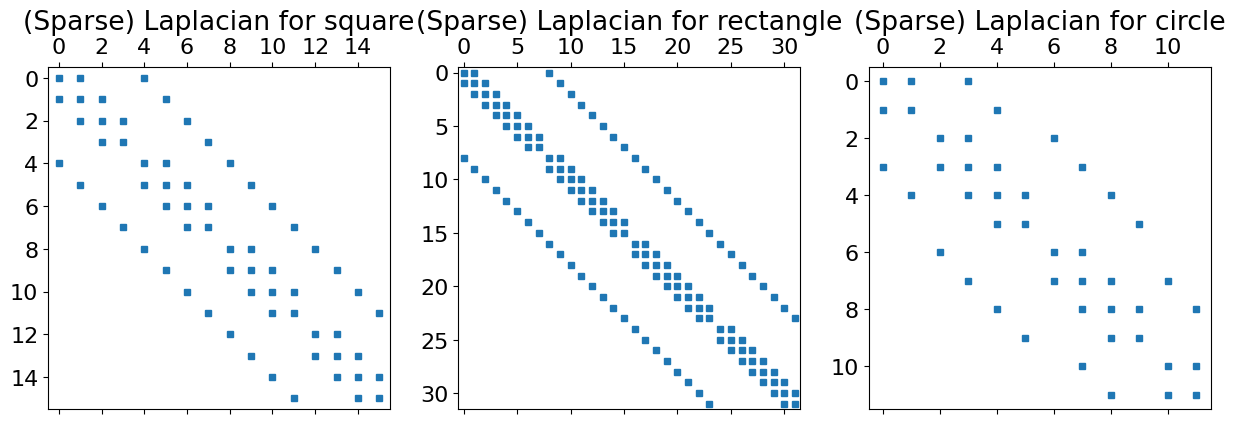

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

for i, shape in enumerate(shapes):
    M, points, h = create_system_matrix(4, shape, 1)
    axes[i].spy(M, markersize=5)
    axes[i].set_title(f"(Sparse) Laplacian for {shape}")

plt.show()

## 1.2 Resulting $v$ for the lowest frequencies

In [4]:
for shape in shapes:
    print(f"\nSolving for {shape} with L={L}")
    M, points, h = create_system_matrix(n, shape, L)
    # Using the new eigenmode_analysis function with mode_to_animate=None for static plots
    frequencies, eigenvectors, _ = eigenmode_analysis(M, points, shape, L, n, h, num_modes=4, saveFig=saveFig, directory=img_dir)


Solving for square with L=1.0

Solving for rectangle with L=1.0

Solving for circle with L=1.0


In [5]:
# Change the grid size for comparison
small_n = 25
for shape in shapes:
    print(f"\nSolver comparison for {shape}:")
    M, _, _ = create_system_matrix(small_n, shape, L)
    compare_solvers(M, num_modes=6, directory=out_dir)
plot_solvers_timings(saveFig=saveFig, directory=out_dir)


Solver comparison for square:
np.linalg.eig(): 0.46150898933410645
np.linalg.eigh(): 0.13846325874328613
scipy.sparse.linalg.eigs(): 0.014980554580688477

Solver comparison for rectangle:
np.linalg.eig(): 1.4452979564666748
np.linalg.eigh(): 0.5363807678222656
scipy.sparse.linalg.eigs(): 0.0244905948638916

Solver comparison for circle:
np.linalg.eig(): 0.23708510398864746
np.linalg.eigh(): 0.07818245887756348
scipy.sparse.linalg.eigs(): 0.004859447479248047


c:\Users\giorg\OneDrive - UvA\Projects\Python\CLS\Scientific Computing\SC_Assignment3\src\plots.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=30, ha='right', fontsize=10)


## 1.3 Dependence of the frequeuncies on the characteristic size of the grid $L$

In [ ]:
n_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
L_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

for shape in shapes:
    print(f"\nSize dependence for {shape}:")
    L_results, n_results = study_size_dependence(shape, n_values, L_values, num_modes=6, saveFig=saveFig, directory=img_dir)


Size dependence for square:


Running shape size dependence:   0%|          | 0/10 [00:00<?, ?it/s]

Running shape size dependence: 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]



Size dependence for rectangle:


Running shape size dependence: 100%|██████████| 10/10 [00:16<00:00,  1.67s/it]



Size dependence for circle:


Running shape size dependence: 100%|██████████| 10/10 [00:03<00:00,  2.76it/s]


## 1.4 Animation of the results over time

In [ ]:
# Create matrices for each shape for animations
square_M, square_points, square_h = create_system_matrix(n, 'square', L)
rectangle_M, rectangle_points, rectangle_h = create_system_matrix(n, 'rectangle', L)
circle_M, circle_points, circle_h = create_system_matrix(n, 'circle', L)


# Animate the first few eigenmodes for each shape. The number of frames is a global variable inside
# plots.py, if fps gets changed in here also change it in plots.py The duration by defualt is 5s.
for mode in range(3):
    print(f"Animating mode {mode+1} for square")
    _, _, ani = eigenmode_analysis(square_M, square_points, 'square', L, n, square_h, 
                                    num_modes=mode+1, mode_to_animate=mode, saveFig=saveFig)
    try:
        print("Saving animation...")
        ani.save(ani_dir + f'square_mode_{mode+1}.mp4', writer='ffmpeg', fps=30, dpi=300)
    except:
        ani.save(ani_dir + f'square_mode_{mode+1}.gif', writer='pillow', fps=30, dpi=300)

for mode in range(3):
    print(f"Animating mode {mode+1} for rectangle")
    _, _, ani = eigenmode_analysis(rectangle_M, rectangle_points, 'rectangle', L, n, rectangle_h, 
                                    num_modes=mode+1, mode_to_animate=mode, saveFig=saveFig)
    try:
        ani.save(ani_dir + f'rectangle_mode_{mode+1}.mp4', writer='ffmpeg', fps=30, dpi=300)
    except:
        ani.save(ani_dir + f'rectangle_mode_{mode+1}.gif', writer='pillow', fps=30, dpi=300)

for mode in range(3):
    print(f"Animating mode {mode+1} for circle")
    _, _, ani = eigenmode_analysis(circle_M, circle_points, 'circle', L, n, circle_h, 
                                    num_modes=mode+1, mode_to_animate=mode, saveFig=saveFig)
    try:
        print("Saving animation...")
        ani.save(ani_dir + f'circle_mode_{mode+1}.mp4', writer='ffmpeg', fps=30, dpi=300)
    except:
        ani.save(ani_dir + f'circle_mode_{mode+1}.gif', writer='pillow', fps=30, dpi=300)

Animating mode 1 for square
Saving animation...
Animating mode 2 for square
Saving animation...
Animating mode 3 for square
Saving animation...


# 3. Leapfrog Integrator for harmonic oscillator

## 3.1 Error convergence analysis

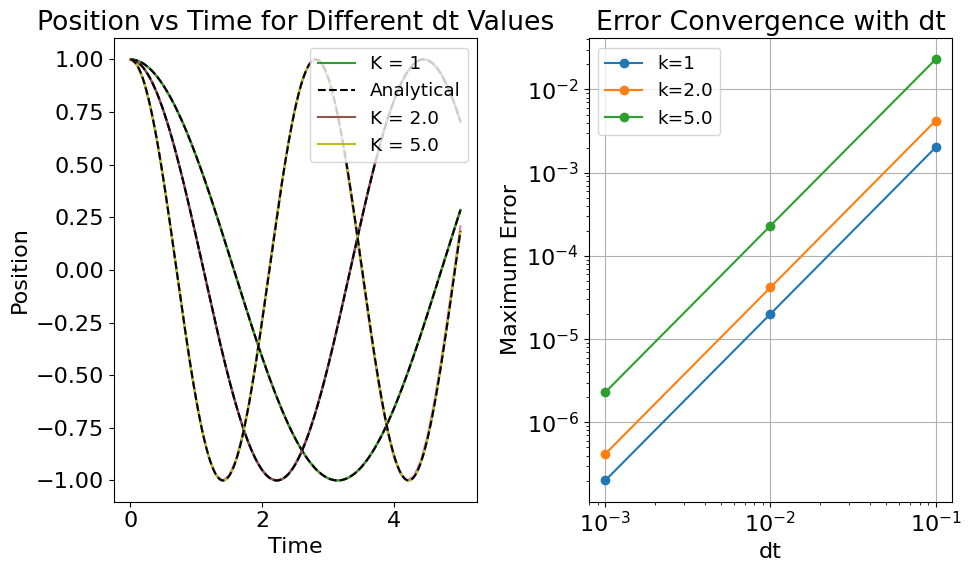

Resonance: 1.0=1
Resonance: 1.0=1
Resonance: 1.0=1


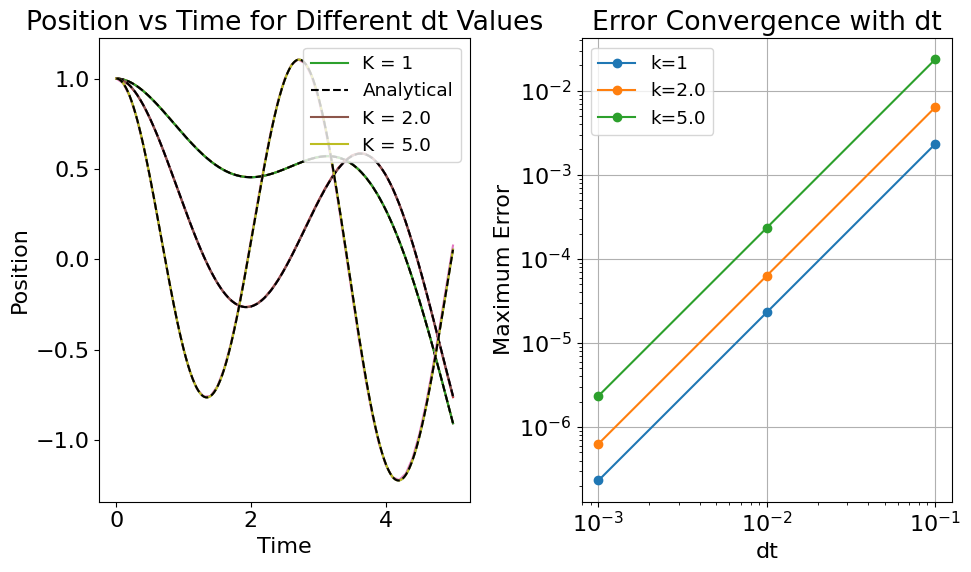

In [2]:
# Parameters
m = 1.0
x0 = 1.0
v0 = 0.0
t_end = 5.0

# Test different dt and k values
k_values = [1, 2.0, 5.0]
dt_values = [0.1, 0.01, 0.001]

# For standard harmonic oscillator
run_leapfrog_experiment(m, k_values, x0, v0, t_end, dt_values, forced=False, savefig=saveFig, directory=img_dir)

# For forced harmonic oscillator
run_leapfrog_experiment(m, k_values, x0, v0, t_end, dt_values, forced=True, savefig=saveFig, directory=img_dir)

## 3.2 Comparison with RK45

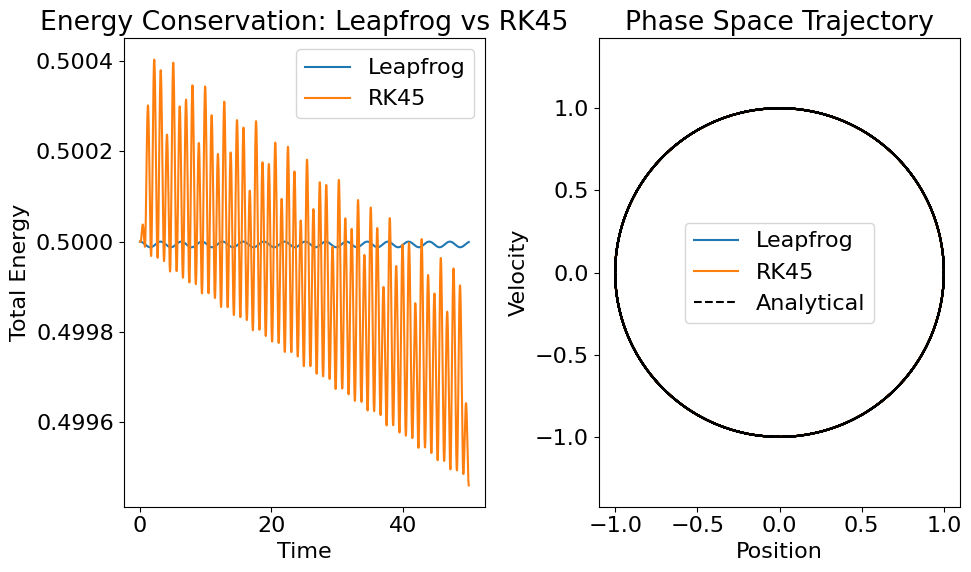

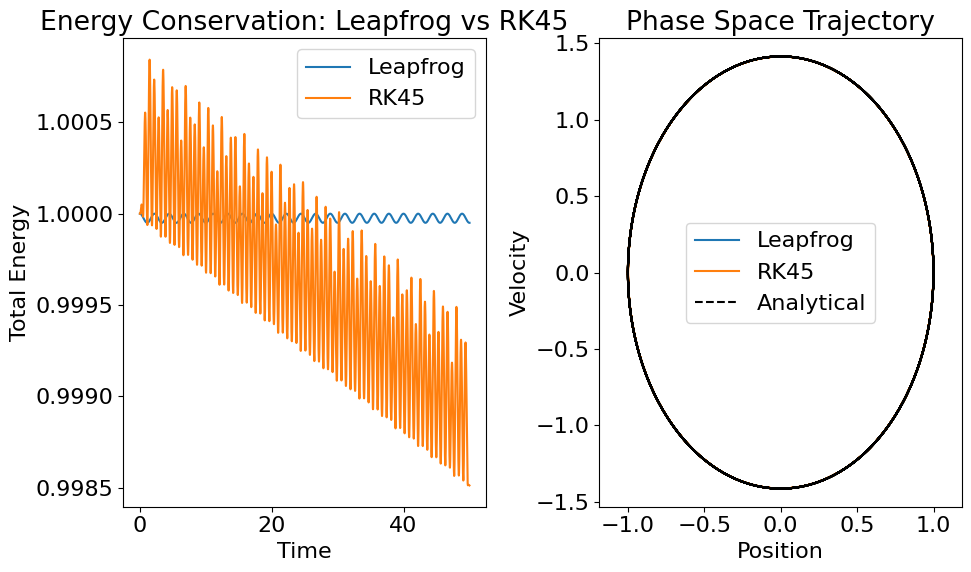

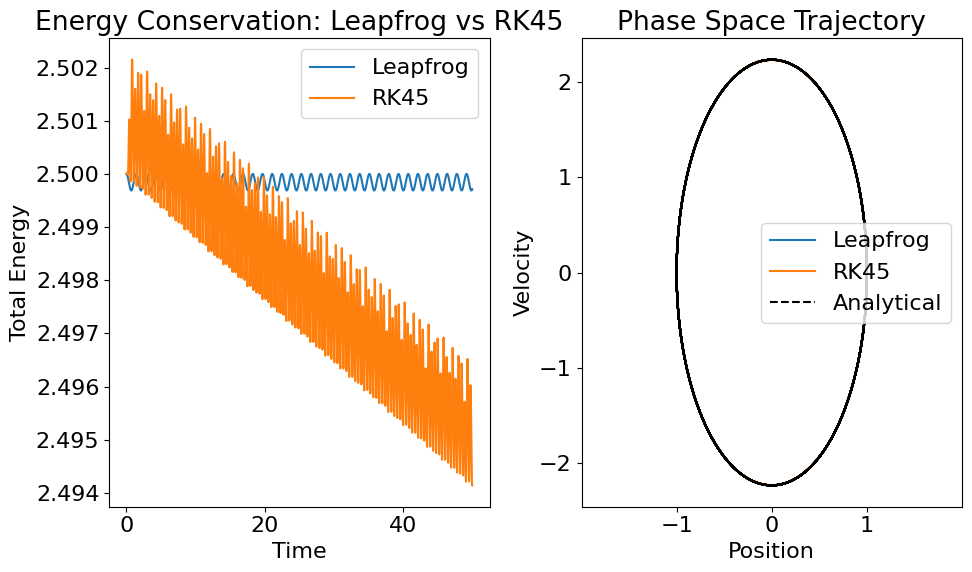

Resonance: 1.0=1


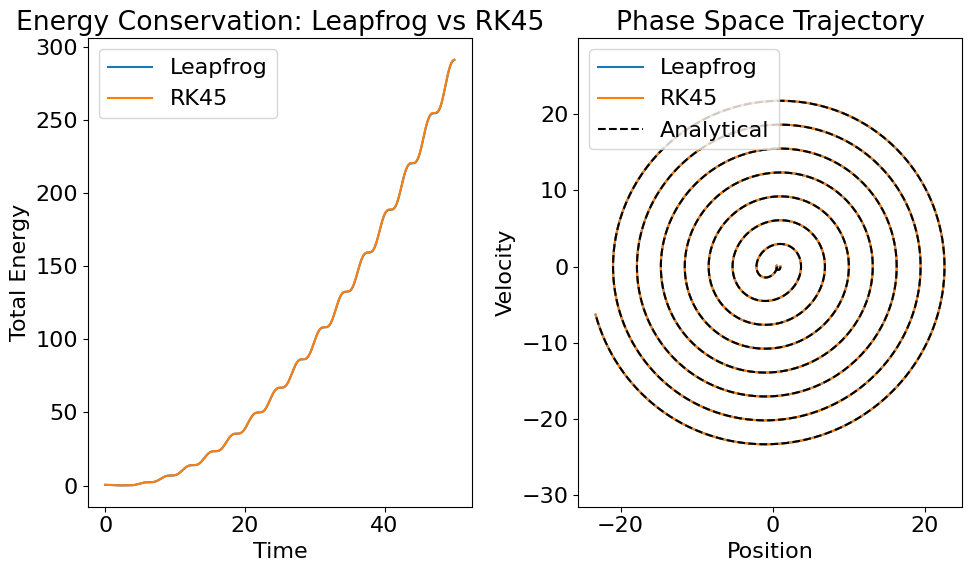

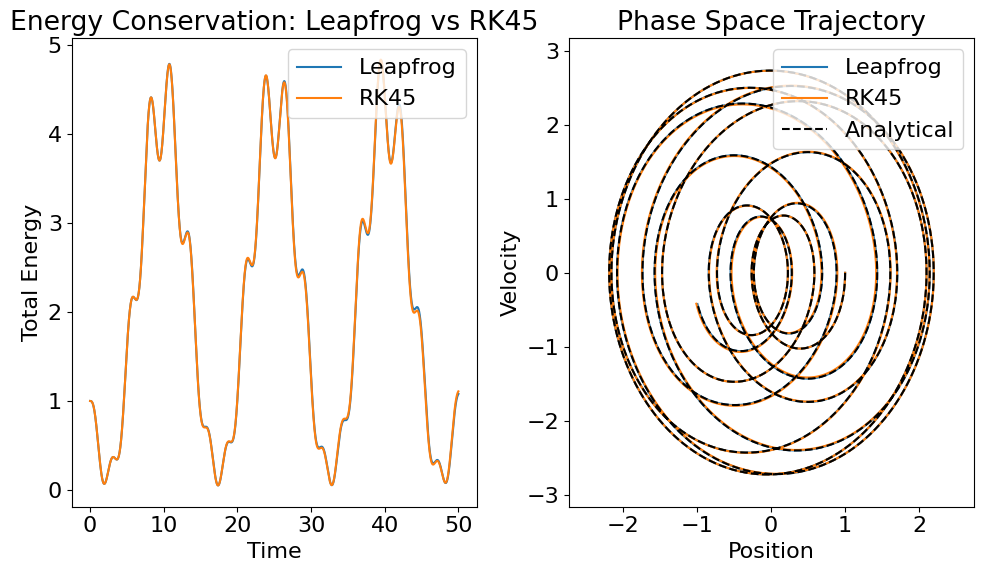

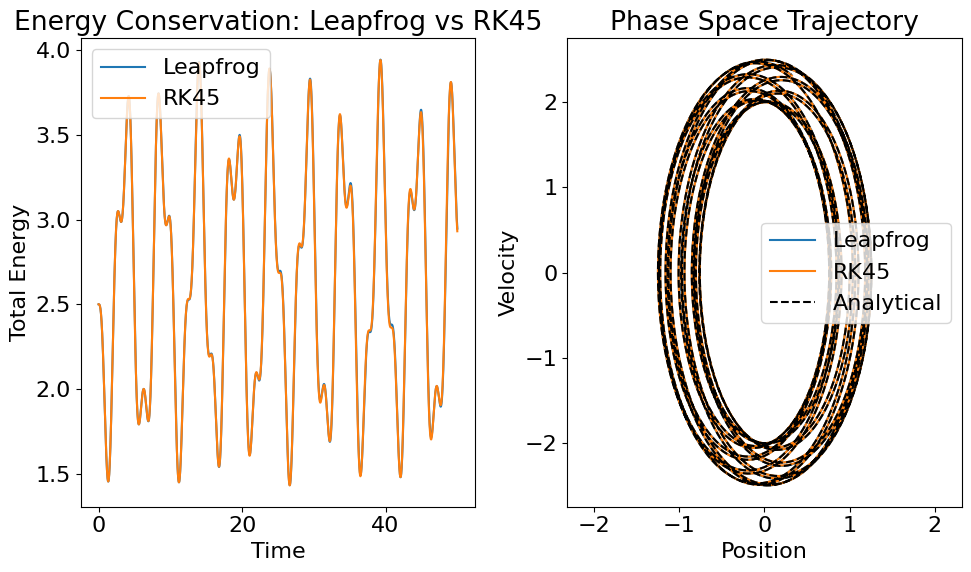

In [3]:
dt = 0.01
t_end = 50
compare_with_rk(m, k_values, x0, v0, t_end, dt, forced=False, savefig=saveFig, directory=img_dir)

# Test with external forcing
compare_with_rk(m, k_values, x0, v0, t_end, dt, forced=True, savefig=saveFig, directory=img_dir)